# 調整飽和度

飽和度是色彩的純度或鮮豔度，以白色缺乏程度表示。飽和度 100% 的色彩不包含任何白色。飽和度 0% 的色彩帶點灰色。


飽和度是色彩的鮮豔度。想像亮橘色，這是相當鮮豔的色彩。隨著彩度降低（色相和明度保持不變），橘色就會逐次變成褐色、褐灰色，最後是中性灰色（飽和度降至 0 之後）。
* 降低飽和度會使色彩流失，只剩下灰階元素。褐灰色和淡紫色都是飽和度低的色彩，因為兩色皆相當中性，只有少許色彩元素。
* 蘋果紅和香蕉黃是飽和度很高的色彩。飽和度是可測量色彩與相同亮度的中性灰之間的差異程度。

在數位影像中，提高飽和度可讓影像色彩更鮮豔、更有「震撼力」，但是飽和度太高也會扭曲色彩，造成膚色不自然等問題。您可以使用「自然飽和色調」控制項，將目標僅設定在低飽和度的區域，而不影響影像的其餘區域。例如，您可以加強影像飽和度較低部分的色彩，而不顯著改變膚色。

http://help.corel.com/paintshop-pro/v20/main/ct/documentation/index.html#page/Corel_PaintShop_Pro/Adjusting_hue_and_saturation.html

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import glob
from IPython.display import clear_output

In [2]:
def show_img(img):
#     plt.figure(figsize=(15,15)) 
    image_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(image_rgb)
    plt.show()

In [3]:
def modify_lightness_saturation(img):
    
    origin_img = img

    # 圖像歸一化，且轉換為浮點型
    fImg = img.astype(np.float32)
    fImg = fImg / 255.0
    
    # 顏色空間轉換 BGR -> HLS
    hlsImg = cv2.cvtColor(fImg, cv2.COLOR_BGR2HLS)
    hlsCopy = np.copy(hlsImg)

    lightness = 0 # lightness 調整為  "1 +/- 幾 %"
    saturation = 300 # saturation 調整為 "1 +/- 幾 %"
 
    # 亮度調整
    hlsCopy[:, :, 1] = (1 + lightness / 100.0) * hlsCopy[:, :, 1]
    hlsCopy[:, :, 1][hlsCopy[:, :, 1] > 1] = 1  # 應該要介於 0~1，計算出來超過1 = 1

    # 飽和度調整
    hlsCopy[:, :, 2] = (1 + saturation / 100.0) * hlsCopy[:, :, 2]
    hlsCopy[:, :, 2][hlsCopy[:, :, 2] > 1] = 1  # 應該要介於 0~1，計算出來超過1 = 1
    
    # 顏色空間反轉換 HLS -> BGR 
    result_img = cv2.cvtColor(hlsCopy, cv2.COLOR_HLS2BGR)
    result_img = ((result_img * 255).astype(np.uint8))

#     print("High Saturation:")
#     show_img(result_img)

    # ---------------- 印出結果圖表 ---------------- #  
    
    plt.figure(figsize=(15,15)) 
    # 畫第一張圖，位於左上角
    plt.subplot(2, 2, 1)                 
    increase_img = cv2.cvtColor(result_img, cv2.COLOR_BGR2RGB)
    plt.imshow(increase_img)
    plt.title("High Saturation", {'fontsize':20})  

    # 畫第二張圖，位於右上角
    plt.subplot(2, 2, 2)
    decrease_img = cv2.cvtColor(origin_img, cv2.COLOR_BGR2RGB)
    plt.imshow(decrease_img)
    plt.title("Origin picture", {'fontsize':20})
    
    plt.show()
    

In [4]:
def img_processing(img):
    # do something here
    modify_lightness_saturation(img)


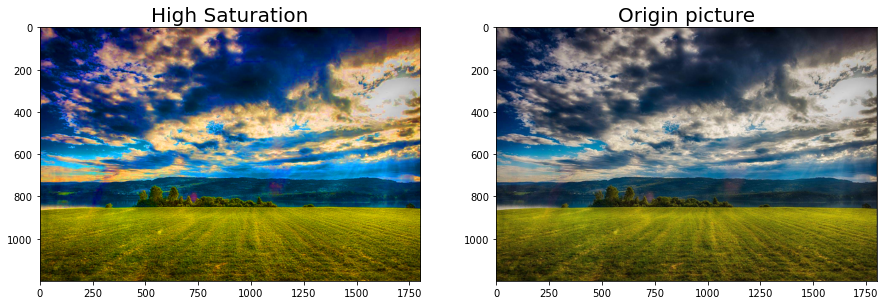

In [5]:
file_name = "./testdata/scenery.jpg"
origin_img = cv2.imread(file_name)
# print("origin picture:")
# show_img(origin_img)

result_img = img_processing(origin_img)
# show_img(result_img)

# Reference

http://help.corel.com/paintshop-pro/v20/main/ct/documentation/index.html#page/Corel_PaintShop_Pro/Adjusting_hue_and_saturation.html

https://www.itdaan.com/tw/6488189fb5d7d60b163039cd0a004f70

https://zhuanlan.zhihu.com/p/67930839